# Material de aula - Redes Neurais e Deep Learning


## <center> Laboratório 4 - Keras: Identificação de Dígitos com CNN </center>

In [1]:
#CÉLULA KE-LIB-01
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Classificação de dígitos a partir da utilização de CNN's.

### Dados: 1000 imagens de treinamento e 100 imagens de teste, obtidas do dataset MNIST (modified National Institute of Standards and Technology) benchmark dataset.

### O dataset completo possui 60.000 imagens de treinamento e 10.000 de teste.

### Dados das imagens: 28 x 28 x 1 pixels (escala de cinza, onde 0=branco e 255=preto)
### Dados da CNN: 784 - 32 - 64 - 10 - 10 (Entrada = 784 pixels, Saída = 10 dígitos)
### Modelo deve ser treinado para 50 épocas

### Formato do arquivo de dados é dado por 1000 linhas seguindo o padrão:

### 2 ** 0 0 152 27 .. 0
### 5 ** 0 0 38 122 .. 0

### onde o primeiro numero é o digito [0 9] enquanto os demais numeros da linha são os 784 pixels

### Os valores numericos foram normalizados com operador Min-Max, os booleanos foram convertidos para [-1, 1] e os categóricos para encoding 1-of(N-1). A saída ficou 3m 0 (sem problema) e 1 (com algum problema).  Os arquivos do Data set já foram previamente processados e separados

### 1 - Importando o Dataset

In [2]:
#CÉLULA KE-LIB-02
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

X_train = train_x[0:1000]
y_train = train_y[0:1000]

X_test = test_x[0:100]
y_test = test_y[0:100]

### As redes CNN do Keras esperam dados de entrada no format de array NumPy com 4 dimensões: 
### [numero de itens, largura da imagem, altura da imagem e numero de canais (1 para escala de cinza e 3 para RGB)]

### 2 - Faça a normalização das imagens e o hot encoding do vetor de saida

In [3]:
#CÉLULA KE-LIB-03
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train / 255

X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test / 255


from sklearn.preprocessing import OneHotEncoder

y_train = y_train.reshape(-1, 1)

onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(-1, 1)
y_test_encoded = onehot_encoder.fit_transform(y_test)

### 3 - Faça a inicialização randômica dos dados

In [4]:
#CÉLULA KE-LIB-04
np.random.seed(4)
tf.set_random_seed(13)

### 4 - Monte o Modelo

In [5]:
#CÉLULA KE-LIB-05
tf.logging.set_verbosity(tf.logging.ERROR) #desliga os warnings do tensorflow

#Inicializador
init = K.initializers.glorot_uniform()

#Criando o otimizador
simple_adadelta = K.optimizers.Adadelta()

#Construindo o modelo (topologia)
model = K.models.Sequential()

#Camada convolucional
model.add(K.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu', input_shape=(28,28,1)))

#Camada convolucional
model.add(K.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same', kernel_initializer=init, activation='relu'))

#MaxPooling
model.add(K.layers.MaxPooling2D(pool_size=(2, 2))) 

#Dropout na camada anterior
model.add(K.layers.Dropout(0.25))

#Flatten para entrada da rede densa
model.add(K.layers.Flatten())

#Rede densa
model.add(K.layers.Dense(units=100, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.Dense(units=10, kernel_initializer=init, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])

### 5 - Execute o Treinamento

In [6]:
#CÉLULA KE-LIB-06
batch_size = 128
max_epochs = 50
print("Iniciando treinamento... ")
h = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=max_epochs, verbose=1)
print("Treinamento finalizado \n")

Iniciando treinamento... 
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9693 - acc: 0.3190
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2605 - acc: 0.5870
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8451 - acc: 0.7410
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6523 - acc: 0.8050
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4623 - acc: 0.8650
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4494 - acc: 0.8550
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3551 - acc: 0.8920
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3088 - acc: 0.9150
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2347 - acc: 0.9320
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2169 - acc: 0.9300
Epo

### 6 - Faça a avaliaçao do Modelo

In [7]:
#CÉLULA KE-LIB-07
eval = model.evaluate(X_train, y_train_encoded, verbose=0)
print("Erro médio do conjunto de treinamento: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

eval = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Erro médio do conjunto de teste: Perda {0:.4f}, acuracia {1:.4f}".format(eval[0], eval[1]*100))

Erro médio do conjunto de treinamento: Perda 0.0002, acuracia 100.0000
Erro médio do conjunto de teste: Perda 0.0514, acuracia 98.0000


### 7 - Salve o modelo em Arquivo

In [8]:
#CÉLULA KE-LIB-8
# Salvando modelo em arquivo
print("Salvando modelo em arquivo \n")
mp = ".\\mnist_model.h5"
model.save(mp)

Salvando modelo em arquivo 



### 8 - Faça um teste de operação com o Modelo

Usando o modelo para previsão de dígitos para a imagem: 


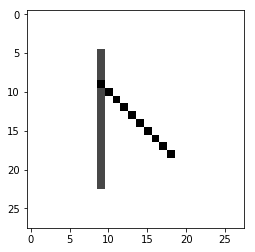


O valor do dígito previsto é: 
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [9]:
print("Usando o modelo para previsão de dígitos para a imagem: ")
unknown = np.zeros(shape=(28,28), dtype=np.float32)
for row in range(5,23): unknown[row][9] = 180 # vertical line
for rc in range(9,19): unknown[rc][rc] = 250 # diagonal line
plt.imshow(unknown, cmap=plt.get_cmap('gray_r'))
plt.show()

unknown = unknown.reshape(1, 28,28,1)
predicted = model.predict(unknown)
print("\nO valor do dígito previsto é: ")
print(predicted)

### 9 - Faça o pós-processamento para fornecer resposta compreensível

In [10]:
# 7. Pos-processamento
str = ['zero', 'um', 'dois', 'tres', 'quatro', 'cinco', 'seis', 'sete', 'oito', 'nove']

index = np.argmax(predicted[0])
digit = str[index]
print(digit)

seis
